In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans


In [3]:
china = load_sample_image("china.jpg")

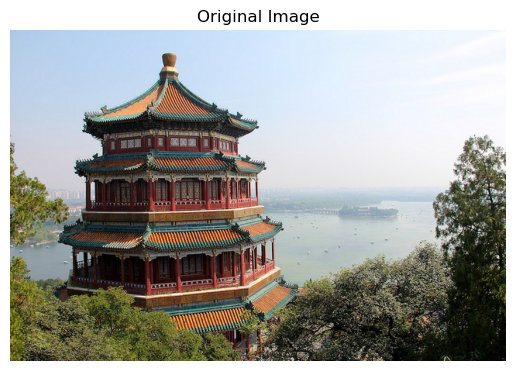

In [4]:
plt.figure()
plt.axis("off")
plt.title("Original Image")
plt.imshow(china)
plt.show()

In [8]:
china_scaled = (china * 255).astype(np.uint8)

In [10]:
china.shape

(427, 640, 3)

In [12]:
w , h , d = original_shape = tuple(china.shape)
assert d == 3

In [14]:
image_array = np.reshape(china_scaled,(w*h, d))

In [26]:
model = KMeans(n_clusters=64,init='k-means++')
target = model.fit_predict(image_array)
color_space = model.cluster_centers_

color_space = np.clip(color_space, 0, 255).astype(np.uint8)


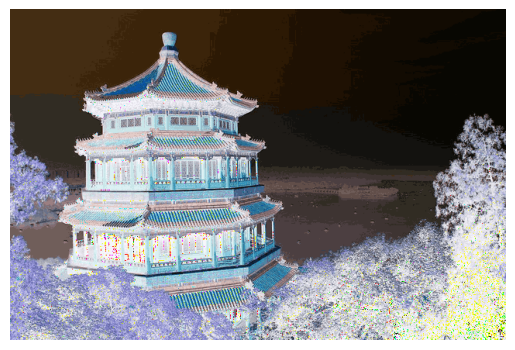

In [27]:
# Reconstruct the image with the new palette
reconstructed_image = color_space[target]

# Reshape the image back to its original shape
reconstructed_image = np.reshape(reconstructed_image, (w, h, d))

# Display the reconstructed image
plt.imshow(reconstructed_image)
plt.axis('off')
plt.show()


In [30]:
print(color_space[:5])

[[ 49  44  35]
 [175 176 226]
 [ 21  78 116]
 [214 212 239]
 [145 145 155]]


In [32]:
print(target[:5])

[20 20 20 20 20]


In [34]:
print(np.min(china), np.max(china)) 

0 255


In [36]:
flower = load_sample_image("flower.jpg")

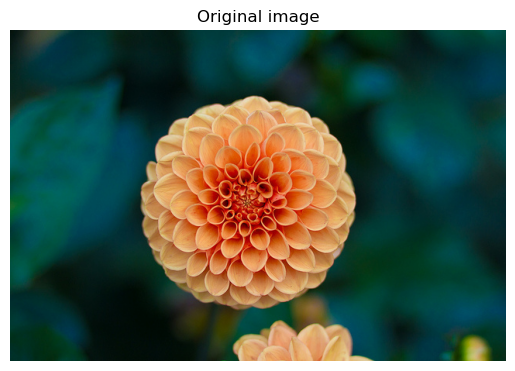

In [42]:
plt.figure()
plt.axis('off')
plt.title('Original image')
plt.imshow(flower)

In [44]:
flower_scaled = (flower*255).astype('uint8')

In [46]:
flower.shape

(427, 640, 3)

In [50]:
image_array = np.reshape(flower_scaled , (flower.shape[0]*flower.shape[1],flower.shape[2]))

In [58]:
model = KMeans(n_clusters=64,init='k-means++',n_init='auto')
target = model.fit_predict(image_array)
color_space = model.cluster_centers_

color_space = np.clip(color_space , 0 , 255).astype('uint8')

In [60]:
color_space[:5]

array([[216, 189, 229],
       [  0, 165, 160],
       [ 60,  96, 145],
       [ 60, 210, 247],
       [251, 232, 240]], dtype=uint8)

In [64]:
target[:5]

array([53, 53,  4,  4,  4])

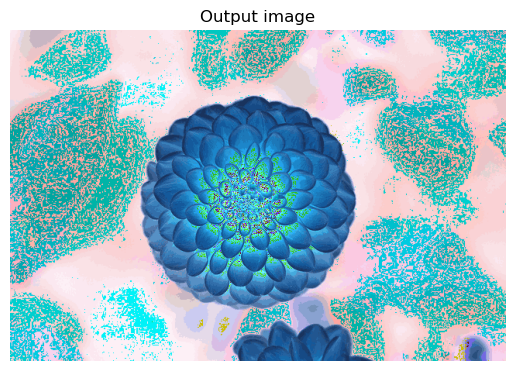

In [70]:
output = color_space[target]
output = np.reshape(output , (flower.shape[0],flower.shape[1],flower.shape[2]))
plt.figure()
plt.axis('off')
plt.title('Output image')
plt.imshow(output)
